# Wstęp
Zadanie 11 stanowi ostatni z trzech etapów zajęć poświęconych sieciom rekurencyjnym i predykcji z wykorzystaniem danych multimodalnych. Efektem wszystkich trzech etapów będzie sieć rekurencyjna z warstwą atencji do predykcji kursu kryptowaluty [Bitcoin](https://en.wikipedia.org/wiki/Bitcoin) (BTC) w oparciu o dane z giełdy oraz o wyniki analizy emocji komunikatów z mediów społecznościowych, do których również należy utworzyć dedykowany model sieci rekurencyjnej. Plan realizacji etapów wygląda następująco:

1.   EmoTweet - model sieci rekurencyjnej do analizy emocji 
2.   MultiBTC - multimodalny model sieci rekurencyjnej do predykcji kursu BTC
3.   AttEmoTweet & AttMultiBTC - rozszerzenie modeli EmoTweet i MultiBTC o warstwę atencji 

Każdy etap jest traktowany jako oddzielna lista na laboratorium, za którą można otrzymać 10 punktów. 

# Cel ćwiczenia

Celem trzeciego etapu prac jest zapoznanie się z mechanizmem atencji oraz jego wykorzystaniem w rekurencyjnych sieciach LSTM zaprojektowanych w poprzednich zadaniach. 

# Warunki zaliczenia

Do zaliczenia trzeciego etapu należy wykonać następujące kroki:

1.   Wzbogacenie modelu LSTM w warstwę atencji 
2.   Porównanie modelu LSTM z warstwą atencji (AttEmoTweet) dla wybranego modelu emotywnego LSTM w dowolnej konfiguracji z etapu 1 (LSTMEmoTweet).
3.   Porównanie modelu LSTM z warstwą atencji (AttMultiBTC) dla wybranego modelu LSTM do predykcji BTC w dowolnej konfiguracji z etapu 2 (LSTMMultiBTC).
4.   Przeprowadzenie analizy istotności statystycznej różnic pomiędzy wynikami dla par modeli:
  * AttEmoTweet - LSTMEmoTweet
  * AttMultiBTC - LSTMMultiBTC

# Atencja

* [Wprowadzenie do mechanizmu atencji - link 1](https://medium.com/swlh/a-simple-overview-of-rnn-lstm-and-attention-mechanism-9e844763d07b)
* [Wprowadzenie do mechanizmu atencji - link 2](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)
* [Wprowadzenie oraz implementacja mechanizmu atencji w PyTorch - link 3](http://peterbloem.nl/blog/transformers)
* [Przykładowa implementacja mechanizmu atencji w PyTorch w sieci LSTM - link 4](https://github.com/prakashpandey9/Text-Classification-Pytorch/blob/master/models/LSTM_Attn.py)





# Analiza istotności statystycznej różnic

W celu porównania wyników różnych metod na tych samych zbiorach danych, należy kilkukrotnie uruchomić proces uczenia oraz testowania. Z reguły zakłada się, że przy 30 uruchomieniach nie trzeba sprawdzać części warunków (np. czy rozkład próbki jest normalny). Przeważnie jednak wykonuje się 10 powtórzeń uczenie/testowanie dla każdej metody, następnie dla próbki wyników każdej z nich wykonuje się test rozkładu normalnego. Dla tak małych próbek przeważnie używa się testu [Shapiro-Wilka](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/). Jeżeli założenie normalności rozkładu jest spełnione, wówczas próbki można porównać przy użyciu [testu t-Studenta dla prób niezależnych](https://machinelearningmastery.com/use-statistical-significance-tests-interpret-machine-learning-results/). W innym przypadku należy skorzystać z jednego z [testów nieparametrycznych](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/).

### Część 1 

In [ ]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3854, done.
remote: Total 3854 (delta 0), reused 0 (delta 0), pack-reused 3854
Receiving objects: 100% (3854/3854), 8.22 MiB | 34.10 MiB/s, done.
Resolving deltas: 100% (2417/2417), done.


In [ ]:
!cd fastText && mkdir build && cd build && cmake ..  && make && make install

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /content/fastText/build
Scanning dependencies of target fasttext-static_pic
[  2%] Building CXX object CMakeFiles/fasttext-static_pic.dir/src/args.cc.o
[  4%] Building CXX object CMakeFiles/fasttext-static_pic.dir/src/autotune.cc.o
[  6%] Building CXX object CMakeFiles/fasttext-static_pic.dir/src/densematrix.cc.o
[  8%] Building

In [ ]:
!cd fastText && pip install .

Processing /content/fastText
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3087213 sha256=44cafb06c56f3e8130dfd1eac78b6eb6984e7470f59822e13ea2ca70f0c66076
  Stored in directory: /tmp/pip-ephem-wheel-cache-rz52gwjy/wheels/a1/9f/52/696ce6c5c46325e840c76614ee5051458c0df10306987e7443
Successfully built fasttext


In [ ]:
!wget http://jankocon.clarin-pl.eu/share/tweeteval.7z

--2021-05-26 15:38:54--  http://jankocon.clarin-pl.eu/share/tweeteval.7z
Resolving jankocon.clarin-pl.eu (jankocon.clarin-pl.eu)... 156.17.135.34
Connecting to jankocon.clarin-pl.eu (jankocon.clarin-pl.eu)|156.17.135.34|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17390348 (17M) [application/x-7z-compressed]
Saving to: ‘tweeteval.7z’

tweeteval.7z        100%[===================>]  16.58M  7.95MB/s    in 2.1s    

2021-05-26 15:38:56 (7.95 MB/s) - ‘tweeteval.7z’ saved [17390348/17390348]



In [ ]:
!7za x tweeteval.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 17390348 bytes (17 MiB)

Extracting archive: tweeteval.7z
--
Path = tweeteval.7z
Type = 7z
Physical Size = 17390348
Headers Size = 1810
Method = LZMA2:24
Solid = +
Blocks = 1

  0%     59% 66 - tweeteval/datasets/emoji/val_labels.txt                                                 Everything is Ok

Folders: 33
Files: 115
Size:       30563155
Compressed: 17390348


In [ ]:
!wget http://jankocon.clarin-pl.eu/share/fasttext_tweetmodel_btc_sg_100_en.bin

--2021-05-26 15:38:57--  http://jankocon.clarin-pl.eu/share/fasttext_tweetmodel_btc_sg_100_en.bin
Resolving jankocon.clarin-pl.eu (jankocon.clarin-pl.eu)... 156.17.135.34
Connecting to jankocon.clarin-pl.eu (jankocon.clarin-pl.eu)|156.17.135.34|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1740570138 (1.6G) [application/octet-stream]
Saving to: ‘fasttext_tweetmodel_btc_sg_100_en.bin’

fasttext_tweetmodel 100%[===================>]   1.62G  11.6MB/s    in 2m 29s  

2021-05-26 15:41:26 (11.1 MB/s) - ‘fasttext_tweetmodel_btc_sg_100_en.bin’ saved [1740570138/1740570138]



In [ ]:
!python fastText/python/doc/examples/bin_to_vec.py fasttext_tweetmodel_btc_sg_100_en.bin > fasttext_tweetmodel_btc_sg_100_en.vec

tcmalloc: large alloc 1259585536 bytes == 0x5598b0316000 @  0x7fbb0f59a887 0x7fbb0d4e2b63 0x7fbb0d4d077f 0x7fbb0d4d0d91 0x7fbb0d483273 0x7fbb0d4a7e0c 0x55989917c8a8 0x5598991effd5 0x5598991ea4ae 0x55989917dc9f 0x5598991bed79 0x5598991bbcc4 0x55989917c559 0x5598991f04f8 0x55989917d30a 0x5598991eb3b5 0x5598991ea4ae 0x5598991ea1b3 0x5598992b4182 0x5598992b44fd 0x5598992b43a6 0x55989928b723 0x55989928b3cc 0x7fbb0e382bf7 0x55989928b2aa


In [ ]:
!mkdir predictions2

In [ ]:
import fasttext
MODEL_PATH = 'fasttext_tweetmodel_btc_sg_100_en.bin'
vec_model = fasttext.load_model(MODEL_PATH)

In [ ]:
import pandas as pd
TRAIN_PATH = 'tweeteval/datasets/emotion/train_text.txt'
train_texts = pd.read_csv(TRAIN_PATH, sep='\t', header=None)

In [ ]:
#TODO
from tqdm.auto import tqdm
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import os


class LSTM_MODEL(nn.Module):
  def __init__(self,input_size=100, hidden_size=60, num_layers=2, output_size = 4):
    super().__init__()
    self.num_layers = num_layers
    self.hidden_size = hidden_size
    self.input_size = input_size
    self.output_size = output_size
    self.lstm = nn.LSTM(self.input_size, self.hidden_size, self.num_layers,dropout=0.5, batch_first=True)
    self.relu = nn.ReLU()
    self.fc = nn.Linear(hidden_size, output_size)

  def forward(self,sentence):
    lstm_out, hidden = self.lstm(sentence)
    out = self.fc(lstm_out[:, -1])
    return out


In [ ]:
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import TensorDataset, DataLoader

def create_loader(dataset_path, mode="train", batch_size=50):

  texts = pd.read_csv(os.path.join(dataset_path, f'{mode}_text.txt'), sep=' \n', header=None)
  labels = pd.read_csv(os.path.join(dataset_path, f'{mode}_labels.txt'), sep=' \n', header=None)

  texts_tensor = nn.utils.rnn.pad_sequence([torch.Tensor([vec_model.get_word_vector(word) for word in fasttext.tokenize(sentence)]) for sentence in texts[0]], batch_first=True)
  labels_tensor = torch.Tensor(labels[0]).long()
  
  data = TensorDataset(texts_tensor, labels_tensor)
  if mode == 'train':
    loader = DataLoader(data, batch_size = batch_size, shuffle=True, drop_last=True)
  else:
    loader = DataLoader(data, batch_size = batch_size)  
  return loader
  

In [ ]:
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [ ]:
batch_size = 50
datasets_folder_path = os.path.join('tweeteval', 'datasets')
sentiment_path = os.path.join(datasets_folder_path, 'sentiment')
train_dl = create_loader(sentiment_path,'train', batch_size)
test_dl = create_loader(sentiment_path,'test', batch_size)
val_dl = create_loader(sentiment_path,'val', batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [ ]:
from typing import Tuple
from tqdm.auto import tqdm

def count_correct(
    y_pred: torch.Tensor, y_true: torch.Tensor
) -> torch.Tensor:
    preds = torch.argmax(y_pred, dim=1)
    return (preds == y_true).float().sum()

def validate(
    model: nn.Module, 
    loss_fn: torch.nn.CrossEntropyLoss, 
    dataloader: DataLoader
) -> Tuple[torch.Tensor, torch.Tensor]:
    loss = 0
    correct = 0
    all = 0
    for X_batch, y_batch in dataloader:
        y_batch = y_batch.to(device)
        y_pred = model(X_batch.to(device))
        all += len(y_pred)
        loss += loss_fn(y_pred, y_batch).sum()
        correct += count_correct(y_pred, y_batch)
    return loss / all, correct / all


def fit(
    model: nn.Module, 
    optimiser: optim.Optimizer, 
    loss_fn: torch.nn.CrossEntropyLoss, 
    train_dl: DataLoader, 
    val_dl: DataLoader, 
    epochs: int, 
    print_metrics: str = True
):

  metrics = {
        "train_loss":[],
        "train_acc":[],
        "val_loss":[],
        "val_acc":[]
    }
  for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_dl:
      y_pred = model(X_batch.to(device))
      loss = loss_fn(y_pred, y_batch.squeeze().to(device))
      loss.backward()
      optimiser.step()
      optimiser.zero_grad()
         

    if print_metrics:
      val_loss = 0.0
      train_loss = 0.0 
      train_acc = 0.0
      val_acc = 0.0
      
      model.eval()
      with torch.no_grad():
          train_loss, train_acc = validate(
                  model=model, loss_fn=loss_fn, dataloader=train_dl
              ) 
          val_loss, val_acc = validate(
                  model=model, loss_fn=loss_fn, dataloader=val_dl
              )

          metrics["train_loss"].append(train_loss)
          metrics["train_acc"].append(train_acc)
          metrics["val_loss"].append(val_loss)
          metrics["val_acc"].append(val_acc)
          # for X_batch, y_batch in val_dl: 
          #     y_pred = model(X_batch)
          #     val_loss+=loss_fn(y_pred, y_batch.squeeze())
          #     prediction = torch.argmax(y_pred,dim=1).detach().cpu()
              
          #     val_acc += torch.sum((prediction == y_batch).float())


          print(
              f"Epoch {epoch}: "
              f"train loss = {train_loss:.5f} "
              f"train acc = {train_acc:.3f} "
              f"validation loss = {val_loss:.5f} "
              f"validation acc = {val_acc:.3f} "
          )
  return metrics

In [ ]:
sentiment_model = LSTM_MODEL(hidden_size=120,num_layers=4, output_size=3)
sentiment_model.cuda()
lr = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(sentiment_model.parameters(), lr=lr)

METRICS_1 = {}

METRICS_1["baseline"] = fit(
    sentiment_model, optimizer, loss_fn, 
    train_dl,val_dl,
    epochs = 20, print_metrics = True
)

Epoch 0: train loss = 0.01803 train acc = 0.553 validation loss = 0.01841 validation acc = 0.538 
Epoch 1: train loss = 0.01603 train acc = 0.623 validation loss = 0.01667 validation acc = 0.603 
Epoch 2: train loss = 0.01550 train acc = 0.645 validation loss = 0.01592 validation acc = 0.636 
Epoch 3: train loss = 0.01519 train acc = 0.647 validation loss = 0.01582 validation acc = 0.626 
Epoch 4: train loss = 0.01434 train acc = 0.673 validation loss = 0.01512 validation acc = 0.651 
Epoch 5: train loss = 0.01383 train acc = 0.686 validation loss = 0.01457 validation acc = 0.680 
Epoch 6: train loss = 0.01344 train acc = 0.692 validation loss = 0.01433 validation acc = 0.681 
Epoch 7: train loss = 0.01313 train acc = 0.706 validation loss = 0.01442 validation acc = 0.686 
Epoch 8: train loss = 0.01300 train acc = 0.706 validation loss = 0.01441 validation acc = 0.677 
Epoch 9: train loss = 0.01213 train acc = 0.730 validation loss = 0.01429 validation acc = 0.693 
Epoch 10: train loss

In [ ]:

from torch.autograd import Variable
class AttentionModel(nn.Module):
  def __init__(self, batch_size, output_size, hidden_size):
    super(AttentionModel, self).__init__()

    self.batch_size = batch_size
    self.output_size = output_size
    self.hidden_size = hidden_size

    self.lstm = nn.LSTM(100, hidden_size,dropout=0.5)
    self.label = nn.Linear(hidden_size, output_size)
  
  def attention_net(self, lstm_output, final_state):
    hidden = final_state.squeeze(0)
    attn_weights = torch.bmm(lstm_output, hidden.unsqueeze(2)).squeeze(2)
    soft_attn_weights = F.softmax(attn_weights, 1)
    new_hidden_state = torch.bmm(lstm_output.transpose(1,2), soft_attn_weights.unsqueeze(2)).squeeze(2)

    return new_hidden_state

  def forward(self, input):
    input = torch.swapaxes(input, 0, 1)
    h_0 = Variable(torch.zeros(1,self.batch_size, self.hidden_size).cuda())
    c_0 = Variable(torch.zeros(1,self.batch_size,self.hidden_size).cuda())

    output, (final_hidden_state, final_cell_state) = self.lstm(input, (h_0, c_0))
    output = output.permute(1, 0, 2)

    attn_output = self.attention_net(output, final_hidden_state)
    logits = self.label(attn_output)

    return logits

In [ ]:
sentiment_model_attn = AttentionModel(batch_size=50,output_size=3,hidden_size=120)
sentiment_model_attn.cuda()
lr = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(sentiment_model_attn.parameters(), lr=lr)


METRICS_1["attention"] = fit(
    sentiment_model_attn, optimizer, loss_fn, 
    train_dl,val_dl,
    epochs = 20, print_metrics = True
)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Epoch 0: train loss = 0.01550 train acc = 0.641 validation loss = 0.01611 validation acc = 0.625 
Epoch 1: train loss = 0.01498 train acc = 0.651 validation loss = 0.01570 validation acc = 0.636 
Epoch 2: train loss = 0.01438 train acc = 0.672 validation loss = 0.01498 validation acc = 0.656 
Epoch 3: train loss = 0.01403 train acc = 0.679 validation loss = 0.01492 validation acc = 0.670 
Epoch 4: train loss = 0.01367 train acc = 0.687 validation loss = 0.01464 validation acc = 0.678 
Epoch 5: train loss = 0.01328 train acc = 0.700 validation loss = 0.01440 validation acc = 0.678 
Epoch 6: train loss = 0.01310 train acc = 0.702 validation loss = 0.01445 validation acc = 0.681 
Epoch 7: train loss = 0.01268 train acc = 0.710 validation loss = 0.01468 validation acc = 0.671 
Epoch 8: train loss = 0.01200 train acc = 0.730 validation loss = 0.01433 validation acc = 0.683 
Epoch 9: train loss = 0.01138 train acc = 0.748 validation loss = 0.01442 validation acc = 0.695 
Epoch 10: train loss

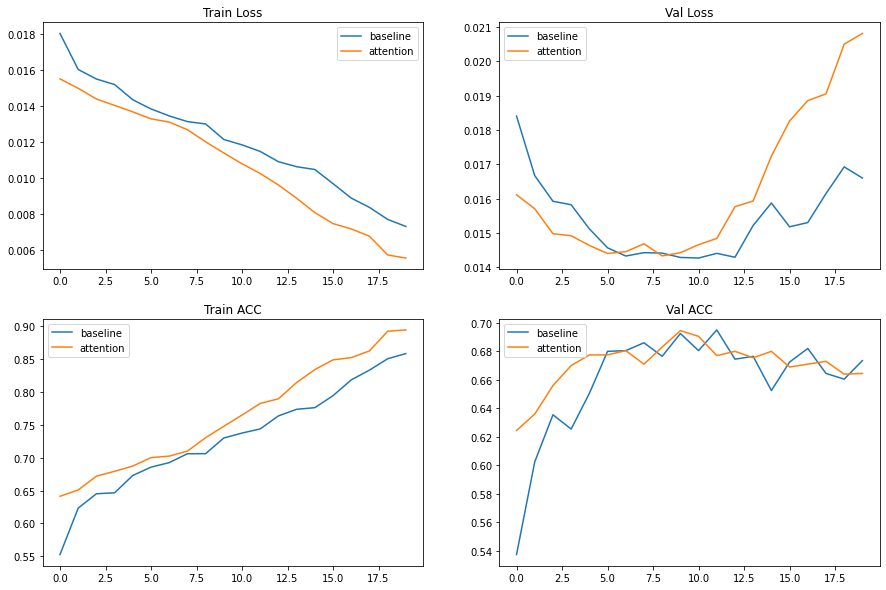

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(15,10))

for key in METRICS_1.keys():
  ax[0][0].plot(METRICS_1[key]['train_loss'], label=key)
  ax[0][1].plot(METRICS_1[key]['val_loss'], label=key)
  ax[1][0].plot(METRICS_1[key]['train_acc'], label=key)
  ax[1][1].plot(METRICS_1[key]['val_acc'], label=key)

ax[0][0].set_title('Train Loss')
ax[0][0].legend()

ax[0][1].set_title('Val Loss')
ax[0][1].legend()

ax[1][0].set_title('Train ACC')
ax[1][0].legend()

ax[1][1].set_title('Val ACC')
ax[1][1].legend()
plt.legend()
plt.show()

### 2 część

In [ ]:
!wget http://jankocon.clarin-pl.eu/share/bitcoin_tweets_2M.csv.7z

--2021-05-26 15:53:58--  http://jankocon.clarin-pl.eu/share/bitcoin_tweets_2M.csv.7z
Resolving jankocon.clarin-pl.eu (jankocon.clarin-pl.eu)... 156.17.135.34
Connecting to jankocon.clarin-pl.eu (jankocon.clarin-pl.eu)|156.17.135.34|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97590055 (93M) [application/x-7z-compressed]
Saving to: ‘bitcoin_tweets_2M.csv.7z’

bitcoin_tweets_2M.c 100%[===================>]  93.07M  11.2MB/s    in 8.9s    

2021-05-26 15:54:07 (10.4 MB/s) - ‘bitcoin_tweets_2M.csv.7z’ saved [97590055/97590055]



In [ ]:
!7za x bitcoin_tweets_2M.csv.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 97590055 bytes (94 MiB)

Extracting archive: bitcoin_tweets_2M.csv.7z
--
Path = bitcoin_tweets_2M.csv.7z
Type = 7z
Physical Size = 97590055
Headers Size = 146
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      3% - bitcoin_tweets_2M.csv                              7% - bitcoin_tweets_2M.csv                             10% - bitcoin_tweets_2M.csv                             14% - bitcoin_tweets_2M.csv                             17% - bitcoin_tweets_2M.csv  

In [ ]:

tweets_data = pd.read_csv('bitcoin_tweets_2M.csv')

In [ ]:
!wget http://jankocon.clarin-pl.eu/share/bitstamp.7z

--2021-05-26 15:54:31--  http://jankocon.clarin-pl.eu/share/bitstamp.7z
Resolving jankocon.clarin-pl.eu (jankocon.clarin-pl.eu)... 156.17.135.34
Connecting to jankocon.clarin-pl.eu (jankocon.clarin-pl.eu)|156.17.135.34|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 773846 (756K) [application/x-7z-compressed]
Saving to: ‘bitstamp.7z’

bitstamp.7z         100%[===================>] 755.71K  1.32MB/s    in 0.6s    

2021-05-26 15:54:31 (1.32 MB/s) - ‘bitstamp.7z’ saved [773846/773846]



In [ ]:
!7za x bitstamp.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 773846 bytes (756 KiB)

Extracting archive: bitstamp.7z
--
Path = bitstamp.7z
Type = 7z
Physical Size = 773846
Headers Size = 221
Method = LZMA2:3m
Solid = +
Blocks = 1

  0%    Everything is Ok

Files: 2
Size:       3036393
Compressed: 773846


In [ ]:
import gc

gc.collect()

8443

In [ ]:

gc.collect()

88

In [ ]:
bitstamp_data_1h = pd.read_csv('Bitstamp_BTCUSD_1h_2017_2018_2019_2020_2021-04-08.csv')

In [ ]:

sen_model = fasttext.load_model("sen_model.bin")

In [ ]:
tweets_data['sentiment'] = tweets_data['text'].apply(lambda x: int(sen_model.predict(x)[0][0].strip('__label__')))


In [ ]:
gc.collect()

88

In [ ]:
tweets_data['date'] = pd.to_datetime(tweets_data['timestamp'], format='%Y-%m-%d %H:%M:%S')


df_1h = pd.read_csv('Bitstamp_BTCUSD_1h_2017_2018_2019_2020_2021-04-08.csv')
df_1h['date'] = pd.to_datetime(df_1h['date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
min_t = tweets_data['timestamp'].min()
max_t = tweets_data['timestamp'].max()

df_1h = df_1h[(df_1h['date'] >= min_t) & (df_1h['date'] <= max_t)]

In [ ]:
new_columns = {
    'likes_count': [],
    'retweets_count': [],
    'sen_negative_count': [],
    'sen_neutral_count': [],
    'sen_positive_count': [],
}

time_interval = pd.Timedelta(hours=1)
for id, row in df_1h.iterrows():
  one_interval_back = row['date'] - time_interval
  tweets_sub = tweets_data[(tweets_data['date'] <= row['date']) & (tweets_data['date'] >= one_interval_back)]
  tweets_count = len(tweets_sub)

  new_columns['likes_count'].append(tweets_sub['likes'].sum())
  new_columns['retweets_count'].append(tweets_sub['retweets'].sum())
  new_columns['sen_negative_count'].append((tweets_sub['sentiment'] == 0).sum())
  new_columns['sen_neutral_count'].append((tweets_sub['sentiment'] == 1).sum())
  new_columns['sen_positive_count'].append((tweets_sub['sentiment'] == 2).sum())

for key, val in new_columns.items():
  df_1h[key] = val

In [ ]:
gc.collect()

88

In [ ]:
train_1h = df_1h.iloc[:int(0.7 * len(df_1h))]
val_1h = df_1h.iloc[int(0.7 * len(df_1h)):int(0.85 * len(df_1h))]
test_1h = df_1h.iloc[int(0.85 * len(df_1h)):]


In [ ]:

def prepare_dataloader(df, seq_length=10, batch_size=100):
  X = df.drop(['close'], axis=1)
  y = df['close'][seq_length:].values
  X_seq = []
  for i in range(len(X) - seq_length):
    X_seq.append(X[i:i+seq_length].values)
  
  dataset = TensorDataset(torch.Tensor(X_seq), torch.from_numpy(y))
  return DataLoader(dataset, batch_size=batch_size, pin_memory=True, drop_last=True, shuffle=False)

In [ ]:
train_1h.drop(['timestamp', 'date'], axis=1, inplace=True)
val_1h.drop(['timestamp', 'date'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_1h_normed = pd.DataFrame(scaler.fit_transform(train_1h), columns = train_1h.columns)
val_1h_normed = pd.DataFrame(scaler.transform(val_1h), columns = val_1h.columns)

In [ ]:
from torch import nn

class LSTMMODEL(nn.Module):
  def __init__(self, in_size, hidden_size= 60, num_layers = 2, out_size = 1, dropout=0.5):
    super().__init__()
    self.lstm = nn.LSTM(in_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
    self.linear = nn.Linear(hidden_size, out_size)

  def forward(self, x):
    x, _ = self.lstm(x)
    x = self.linear(x[:, -1])
    return x

In [ ]:
from sklearn.metrics import r2_score
import torch.optim as optim

def validate(
    model: torch.nn.Module, 
    loss_fn: torch.nn.MSELoss, 
    dataloader: torch.utils.data.DataLoader,
):
    model.eval()
    y_preds = []
    y_trues = []
    loss = 0
    correct = 0
    all = 0
    for X_batch, y_batch in dataloader:
        y_batch_temp = y_batch.view(-1,1)
        y_pred = model(X_batch.cuda())
        all += len(y_pred)
        loss += loss_fn(y_pred, y_batch_temp.cuda())
        y_preds.append(y_pred)
        y_trues.append(y_batch_temp)
        r2 = r2_score(y_true=y_batch_temp.detach().cpu().numpy(), y_pred=y_pred.detach().cpu().numpy())
    return loss / all, r2 


def fit(model: nn.Module, 
        optimiser: optim.Optimizer, 
        loss_fn: torch.nn.CrossEntropyLoss, 
        train_dl: DataLoader, 
        val_dl: DataLoader, 
        epochs: int,
        print_metrics = False):
    
    metrics = {
        "train_loss":[],
        "train_r2":[],
        "val_loss":[],
        "val_r2":[]
    }
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_dl:
            y_pred= model(X_batch.cuda())

            loss = loss_fn(y_pred.float(), y_batch.view(-1,1).float().cuda())
            loss.backward()
            optimiser.step()
            optimiser.zero_grad()
    
        model.eval()
        if val_dl is not None: 
            with torch.no_grad():
                train_loss, train_r2 = validate(
                  model=model, loss_fn=loss_fn, dataloader=train_dl
                )
                
                val_loss, val_r2 = validate(
                  model=model, loss_fn=loss_fn, dataloader=val_dl
                )
                
                metrics["train_loss"].append(train_loss)
                metrics["train_r2"].append(train_r2)
                metrics["val_loss"].append(val_loss)
                metrics["val_r2"].append(val_r2)

                if print_metrics:
                    print(
                      f"Epoch {epoch+1}: "
                      f"train loss = {train_loss:f} (r2: {train_r2:f}), "
                      f"validation loss = {val_loss:f} (r2: {val_r2:f})"
                    )
    
    return metrics

In [ ]:
train_1h_dl = prepare_dataloader(train_1h_normed)
val_1h_dl = prepare_dataloader(val_1h_normed)
model_1h = LSTMMODEL(9, hidden_size=50, num_layers=1, out_size=1, dropout=0).cuda()
optimizer = torch.optim.Adam(model_1h.parameters())
loss_fn = torch.nn.MSELoss()

METRICS_1h = {}

METRICS_1h['baseline'] = fit(model= model_1h, 
    optimiser = optimizer, 
    loss_fn = loss_fn, 
    train_dl = train_1h_dl, 
    val_dl = val_1h_dl, 
    epochs = 50,
    print_metrics = True)



Epoch 1: train loss = 0.002204 (r2: -1.656941), validation loss = 0.000720 (r2: -9.853107)
Epoch 2: train loss = 0.001032 (r2: 0.437465), validation loss = 0.000112 (r2: 0.422983)
Epoch 3: train loss = 0.000584 (r2: 0.288962), validation loss = 0.000049 (r2: 0.786302)
Epoch 4: train loss = 0.000496 (r2: 0.669555), validation loss = 0.000026 (r2: 0.853484)
Epoch 5: train loss = 0.000487 (r2: 0.873647), validation loss = 0.000029 (r2: 0.881644)
Epoch 6: train loss = 0.000478 (r2: 0.896948), validation loss = 0.000026 (r2: 0.902144)
Epoch 7: train loss = 0.000459 (r2: 0.900225), validation loss = 0.000020 (r2: 0.922955)
Epoch 8: train loss = 0.000435 (r2: 0.897745), validation loss = 0.000016 (r2: 0.930401)
Epoch 9: train loss = 0.000409 (r2: 0.902540), validation loss = 0.000014 (r2: 0.932122)
Epoch 10: train loss = 0.000383 (r2: 0.904717), validation loss = 0.000013 (r2: 0.931621)
Epoch 11: train loss = 0.000358 (r2: 0.908347), validation loss = 0.000012 (r2: 0.930917)
Epoch 12: train l

In [ ]:

from torch.autograd import Variable
class AttentionModel(nn.Module):
  def __init__(self, batch_size, output_size, hidden_size):
    super(AttentionModel, self).__init__()

    self.batch_size = batch_size
    self.output_size = output_size
    self.hidden_size = hidden_size

    self.lstm = nn.LSTM(9, hidden_size,dropout=0.5)
    self.label = nn.Linear(hidden_size, output_size)
  
  def attention_net(self, lstm_output, final_state):
    hidden = final_state.squeeze(0)
    attn_weights = torch.bmm(lstm_output, hidden.unsqueeze(2)).squeeze(2)
    soft_attn_weights = F.softmax(attn_weights, 1)
    new_hidden_state = torch.bmm(lstm_output.transpose(1,2), soft_attn_weights.unsqueeze(2)).squeeze(2)

    return new_hidden_state

  def forward(self, input):
    input = torch.swapaxes(input, 0, 1)
    h_0 = Variable(torch.zeros(1,self.batch_size, self.hidden_size).cuda())
    c_0 = Variable(torch.zeros(1,self.batch_size,self.hidden_size).cuda())

    output, (final_hidden_state, final_cell_state) = self.lstm(input, (h_0, c_0))
    output = output.permute(1, 0, 2)

    attn_output = self.attention_net(output, final_hidden_state)
    logits = self.label(attn_output)

    return logits

In [ ]:
bitcoin_model_attn = AttentionModel(batch_size=100,output_size=1,hidden_size=50)
bitcoin_model_attn.cuda()
lr = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(bitcoin_model_attn.parameters(), lr=lr)
loss_fn = torch.nn.MSELoss()


METRICS_1h['attention'] = fit(model= bitcoin_model_attn, 
    optimiser = optimizer, 
    loss_fn = loss_fn, 
    train_dl = train_1h_dl, 
    val_dl = val_1h_dl, 
    epochs = 50,
    print_metrics = True)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Epoch 1: train loss = 0.001356 (r2: -2.638971), validation loss = 0.000200 (r2: -1.104352)
Epoch 2: train loss = 0.000737 (r2: 0.755300), validation loss = 0.000062 (r2: 0.260679)
Epoch 3: train loss = 0.000506 (r2: 0.903442), validation loss = 0.000036 (r2: 0.695403)
Epoch 4: train loss = 0.000415 (r2: 0.906460), validation loss = 0.000024 (r2: 0.825719)
Epoch 5: train loss = 0.000343 (r2: 0.898347), validation loss = 0.000023 (r2: 0.859837)
Epoch 6: train loss = 0.000312 (r2: 0.876548), validation loss = 0.000021 (r2: 0.868714)
Epoch 7: train loss = 0.000286 (r2: 0.871613), validation loss = 0.000021 (r2: 0.872598)
Epoch 8: train loss = 0.000271 (r2: 0.855004), validation loss = 0.000020 (r2: 0.877317)
Epoch 9: train loss = 0.000258 (r2: 0.863039), validation loss = 0.000019 (r2: 0.881285)
Epoch 10: train loss = 0.000248 (r2: 0.866187), validation loss = 0.000018 (r2: 0.883803)
Epoch 11: train loss = 0.000239 (r2: 0.872467), validation loss = 0.000018 (r2: 0.885005)
Epoch 12: train l

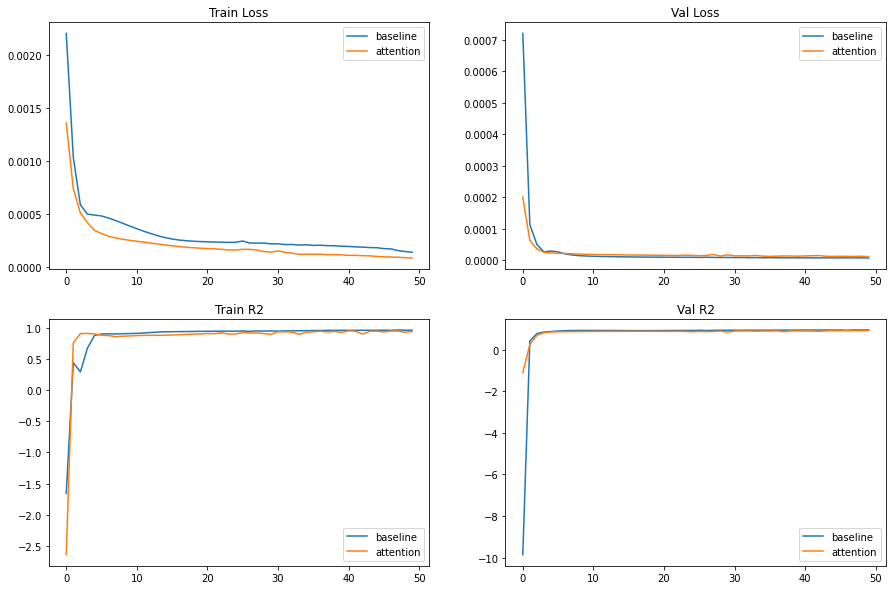

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(15,10))

for key in METRICS_1h.keys():
  ax[0][0].plot(METRICS_1h[key]['train_loss'], label=key)
  ax[0][1].plot(METRICS_1h[key]['val_loss'], label=key)
  ax[1][0].plot(METRICS_1h[key]['train_r2'], label=key)
  ax[1][1].plot(METRICS_1h[key]['val_r2'], label=key)

ax[0][0].set_title('Train Loss')
ax[0][0].legend()

ax[0][1].set_title('Val Loss')
ax[0][1].legend()

ax[1][0].set_title('Train R2')
ax[1][0].legend()

ax[1][1].set_title('Val R2')
ax[1][1].legend()
plt.legend()
plt.show()

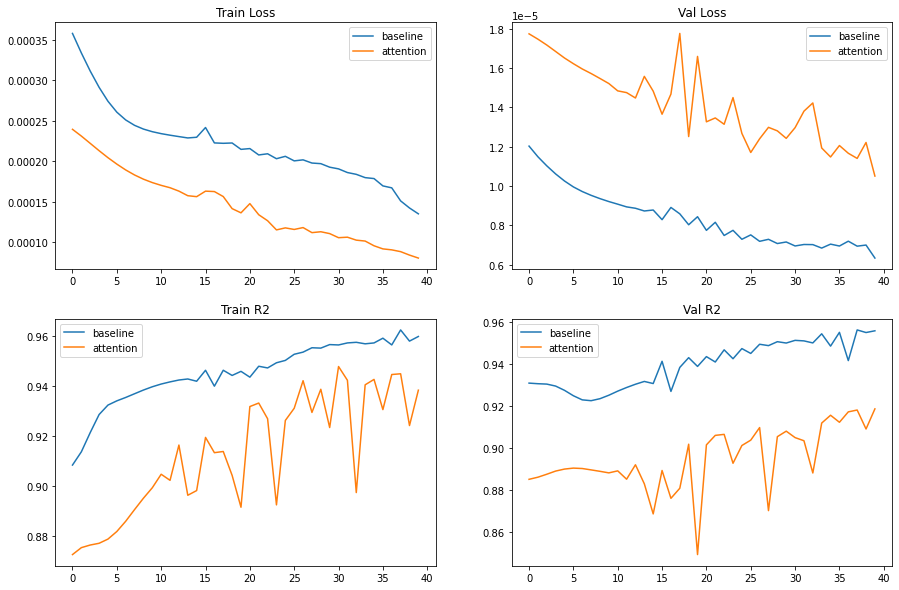

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(15,10))

for key in METRICS_1h.keys():
  ax[0][0].plot(METRICS_1h[key]['train_loss'][10:], label=key)
  ax[0][1].plot(METRICS_1h[key]['val_loss'][10:], label=key)
  ax[1][0].plot(METRICS_1h[key]['train_r2'][10:], label=key)
  ax[1][1].plot(METRICS_1h[key]['val_r2'][10:], label=key)

ax[0][0].set_title('Train Loss')
ax[0][0].legend()

ax[0][1].set_title('Val Loss')
ax[0][1].legend()

ax[1][0].set_title('Train R2')
ax[1][0].legend()

ax[1][1].set_title('Val R2')
ax[1][1].legend()
plt.legend()
plt.show()